In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 读取数据

In [2]:
x_s=pd.read_excel(io='Molecular_Descriptor.xlsx')
print(x_s.shape)
x_s.head()

(1974, 730)


SMILES  nAcid   ALogP    ALogp2  \
0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...      0 -0.2860  0.081796   
1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...      0 -0.8620  0.743044   
2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...      0  0.7296  0.532316   
3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...      0 -0.3184  0.101379   
4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...      0  1.3551  1.836296   

        AMR       apol  naAromAtom  nAromBond  nAtom  nHeavyAtom  ...  \
0  126.1188  74.170169          12         12     64          31  ...   
1  131.9420  80.357341          12         12     70          33  ...   
2  139.9304  74.064997          18         18     62          33  ...   
3  133.4822  80.357341          12         12     70          33  ...   
4  143.1903  76.356583          18         18     64          33  ...   

           MW     WTPT-1    WTPT-2     WTPT-3     WTPT-4    WTPT-5  WPATH  \
0  439.218115  64.771680  2.089409  15.471445   8.858910  3.406628   3011   
1  467.249415  68.960024  2.089698  15.486947   8.863774  3.406648   3516   
2  463.181729  68.748923  2.083301  18.011114  11.390412  3.406644   3542   
3  467.249415  68.883696  2.087385  15.468365   8.857943  3.406624   3594   
4  461.202465  68.883696  2.087385  15.468365   8.857943  3.406624   3594   

   WPOL  XLogP  Zagreb  
0    47  4.666     166  
1    54  5.804     174  
2    52  2.964     176  
3    50  6.015     174  
4    50  4.462     174  

[5 rows x 730 columns]

In [3]:
y_s=pd.read_excel(io='ERα_activity.xlsx')
y_s.head()

SMILES  IC50_nM     pIC50
0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...      2.5  8.602060
1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...      7.5  8.124939
2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...      3.1  8.508638
3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...      3.9  8.408935
4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...      7.4  8.130768

In [4]:
#复制原数据
x=copy.deepcopy(x_s).iloc[:,1:]
y=copy.deepcopy(y_s).iloc[:,-1]
print(x.shape,y.shape)

(1974, 729) (1974,)


### 观察各特征与PIC50的对应关系

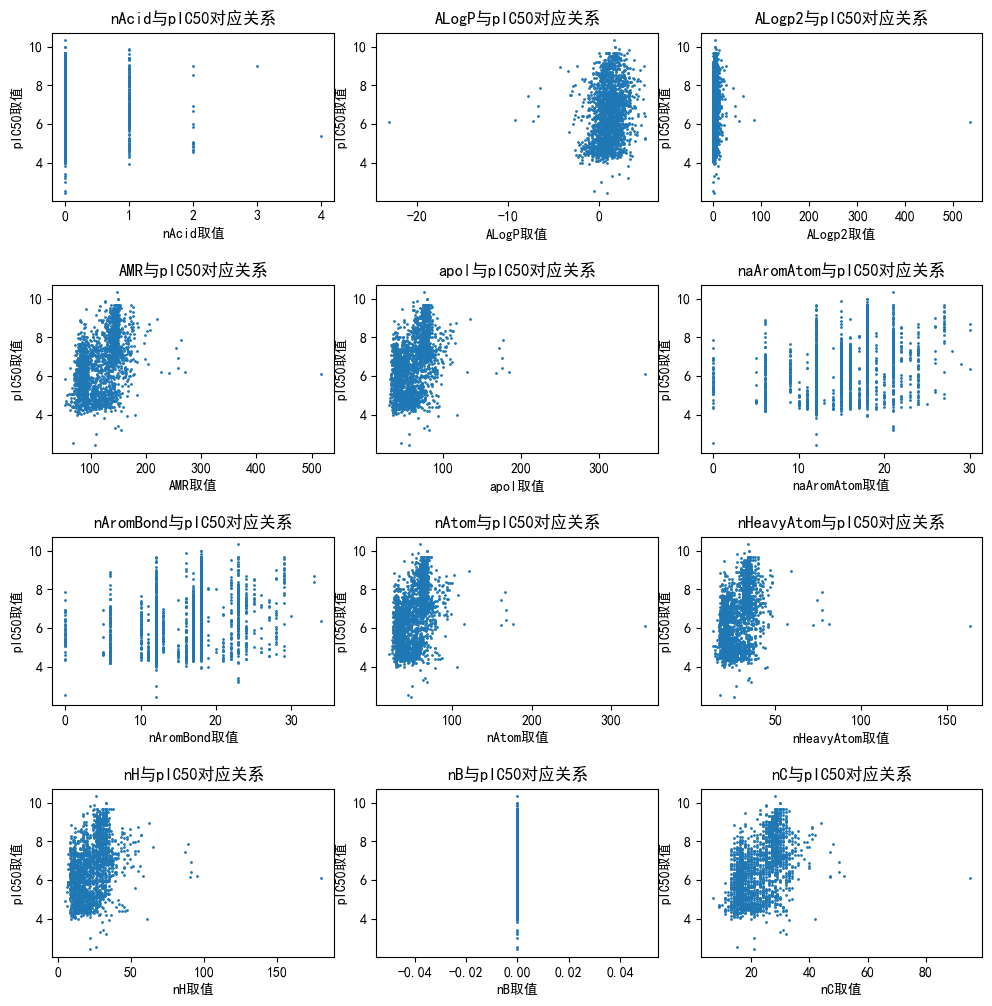

In [5]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.5)
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.scatter(x.iloc[:,i],y,s=1)
    plt.ylabel("pIC50取值")
    plt.xlabel(list(x)[i]+"取值")
    plt.title(list(x)[i]+"与pIC50对应关系")

### 去除低方差

In [6]:
import sklearn.feature_selection as fs


s_model=fs.VarianceThreshold(threshold=0.02)
s_model.fit(x)
x=s_model.transform(x)
variance=s_model.variances_#返回所有数据的方差

x_label_new=pd.DataFrame(x,columns=s_model.get_feature_names_out())
x_label_new2=pd.DataFrame([variance],columns=s_model.feature_names_in_)
new_important=[]
for key in list(x_label_new):
    new_important.append(x_label_new2[key][0])


new_important=pd.DataFrame([new_important],columns=list(x_label_new))

filtr_variance=[]#过滤出需要的高方差
#画一下图
label=[]
for i in range(x.shape[1]):
    for key in x_s:
        a=np.array(x[:,i])
        b=np.array(x_s[key])
        if(np.array_equal(a,b)):
            label.append(key)
            index=x_s.columns.get_loc(key)-1
            filtr_variance.append(variance[index])


##### 过滤前的方差

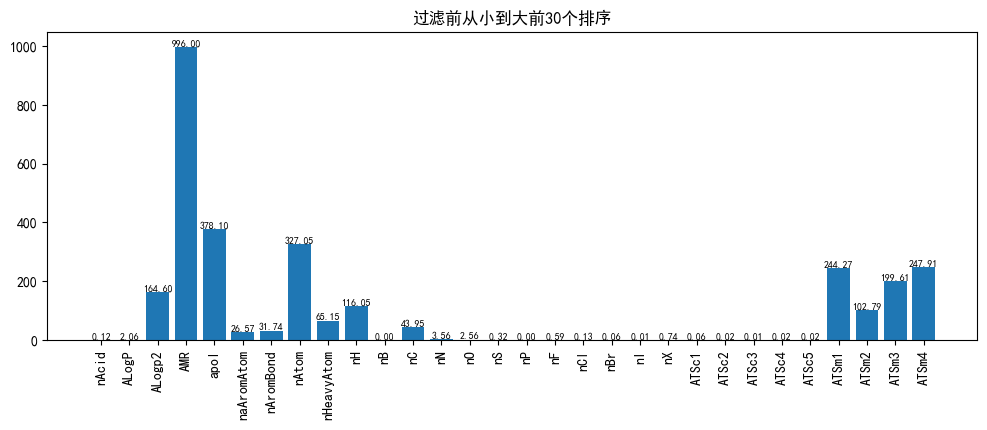

In [7]:
plt.figure(figsize=(12,4))
plt.bar(list(x_s)[1:31],variance[:30])
plt.xticks(rotation=90)
plt.title("过滤前从小到大前30个排序")
for a,b in zip(list(x_s)[1:31],variance[:30]):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
plt.show()

##### 过滤后的方差

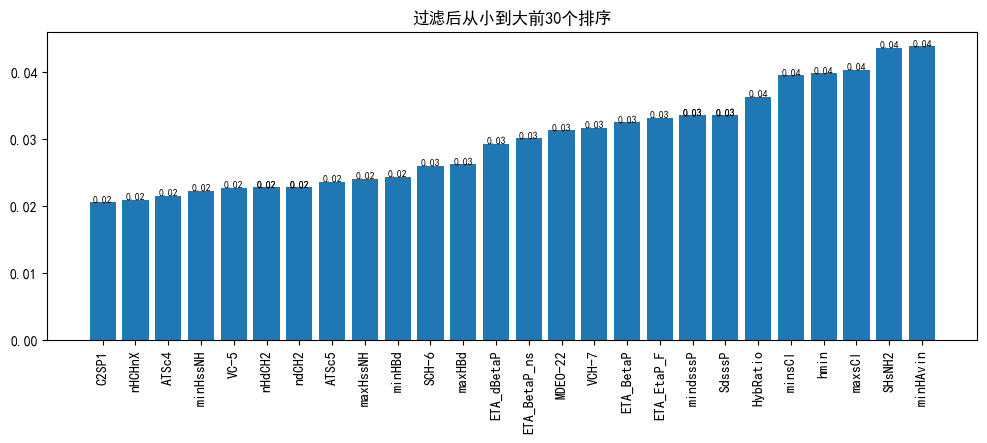

In [8]:

filter_image=pd.DataFrame([filtr_variance],columns=label)

filter_image.sort_values(by=0,inplace=True,axis=1)

plt.figure(figsize=(12,4))
plt.bar(filter_image.columns.values[:30],filter_image.iloc[0,:30])
plt.xticks(rotation=90)
plt.title("过滤后从小到大前30个排序")
for a,b in zip(filter_image.columns.values[:30],filter_image.iloc[0,:30]):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
plt.show()

### 使用随机森林进行特征选择

In [9]:
from sklearn import tree
onethree=tree.DecisionTreeRegressor()
onethree=onethree.fit(x,y)
feature_important=onethree.feature_importances_
feature_important.shape

(393,)

#### 使用词云展示所有特征重要性

(1, 393)
0.0


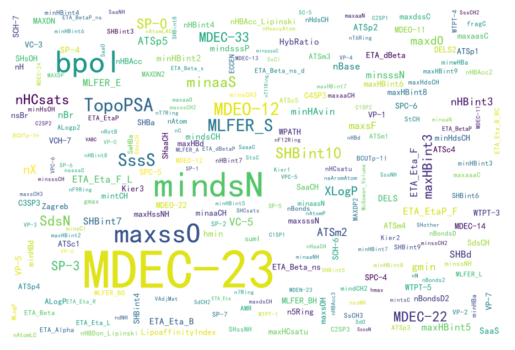

In [10]:
from wordcloud import WordCloud

label_all=[]
for i in range(x.shape[1]):
    for key in x_s:
        a=np.array(x[:,i])
        b=np.array(x_s[key])
        if(np.array_equal(a,b)):
            label_all.append(key)
label_all=pd.DataFrame(label_all)
label_all=label_all.iloc[:,0].unique()

label_important=pd.DataFrame(data=np.array(feature_important).reshape(1,-1),columns=np.array(label_all).reshape(-1))
label_important.sort_values(by=0,axis=1,inplace=True)

# print(list(label_important))
# print(dict(list(label_important)))
# dice_cloud=dict(zip(list(label_important),np.array(label_important)))
dic_cloud=label_important.iloc[-1].to_dict()
print(label_important.shape)
print(dic_cloud["minsOH"])
my_wordcloud=WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=350,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=100           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_cloud)
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
#获取最重要的前三十个的数组
##排序返回从小到大的下标
feature_important_index=feature_important.argsort()
x_thrity=x[:,feature_important_index[-30:]]
pd.DataFrame(x_thrity).head()

0         1         2    3         4    5         6         7   \
0  13.254859  0.000000  0.460175  0.0  6.050188  0.0  5.245435 -1.331303   
1  13.617609  0.000000  0.460175  0.0  6.083246  0.0  5.256770 -1.378628   
2  13.393453  3.358891  0.519350  0.0  6.020424  1.0  4.910140 -1.608354   
3  13.079547  0.000000  0.460206  0.0  6.071897  0.0  5.239956 -1.350874   
4  13.043454  0.000000  0.462912  0.0  6.046045  0.0  5.238827 -1.449689   

         8          9   ...        20        21     22        23        24  \
0  9.019729  58.060335  ...  0.469126  0.000000  2.288 -1.331303  0.269680   
1  9.255431  60.060335  ...  0.449126  0.000000  2.288 -1.378628  0.269680   
2  9.760737  60.392427  ...  0.516534  9.842059  2.901 -1.608354  0.495846   
3  8.706054  57.728243  ...  0.456486  0.000000  2.288 -1.350874  0.269680   
4  8.706054  57.728243  ...  0.473631  0.000000  2.603 -1.449689  0.269680   

      25        26   27         28         29  
0  67.23  6.593009  0.0   9.968948  28.277932  
1  67.23  6.674642  0.0  10.058948  31.076748  
2  87.46  6.502751  0.0   9.752886  30.901064  
3  67.23  6.622142  0.0  10.025028  30.570001  
4  67.23  6.552810  0.0   9.993342  30.570001  

[5 rows x 30 columns]

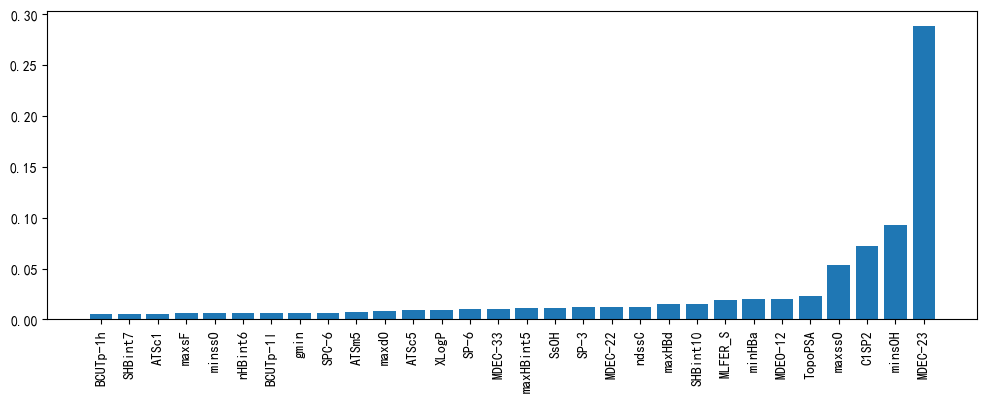

In [12]:
#找到这30列是对应的哪些化合物
label_thrity=[]
for i in range(x_thrity.shape[1]):
    for key in x_s:
        a=np.array(x_thrity[:,i])
        b=np.array(x_s[key])
        if(np.array_equal(a,b)):
            label_thrity.append(key)
plt.figure(figsize=(12,4))
plt.bar(label_thrity,feature_important[feature_important_index][-30:])
plt.xticks(rotation=90)
plt.show()

### 使用皮埃尔相关系数计算30个特征加一个plC50

In [13]:
piaier=x_s[label_thrity]
label_thrity.append('plC50')
piaier=np.concatenate((np.array(piaier),y[:,np.newaxis]),axis=1)
piaier=pd.DataFrame(piaier,columns=label_thrity).corr()
display(piaier)

C:\TempFiles\ipykernel_14256\3909936530.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  piaier=np.concatenate((np.array(piaier),y[:,np.newaxis]),axis=1)


BCUTp-1h   SHBint7     ATSc1     maxsF    minssO   nHBint6  \
BCUTp-1h   1.000000 -0.007238  0.012359 -0.036211  0.158641  0.000081   
SHBint7   -0.007238  1.000000  0.503462  0.017629  0.012085  0.585432   
ATSc1      0.012359  0.503462  1.000000  0.128231  0.415396  0.555792   
maxsF     -0.036211  0.017629  0.128231  1.000000 -0.083998 -0.025679   
minssO     0.158641  0.012085  0.415396 -0.083998  1.000000 -0.035601   
nHBint6    0.000081  0.585432  0.555792 -0.025679 -0.035601  1.000000   
BCUTp-1l   0.002100 -0.113916 -0.321846 -0.535462 -0.078978 -0.089686   
gmin      -0.271027 -0.173477 -0.351431 -0.234439 -0.084747 -0.095129   
SPC-6      0.563207  0.249970  0.352800  0.113430  0.115797  0.214483   
ATSm5      0.539892  0.414950  0.666368  0.068529  0.308179  0.467893   
maxdO      0.023820  0.233749  0.339607 -0.050736 -0.014303  0.136835   
ATSc5     -0.062911 -0.253912 -0.329849  0.085653  0.009726 -0.552485   
XLogP      0.414321 -0.228979 -0.229834  0.031864  0.110249 -0.154622   
SP-6       0.569709  0.231497  0.489623  0.040260  0.373596  0.179621   
MDEC-33    0.198891  0.112638  0.303588  0.104343  0.396701 -0.085212   
maxHBint5 -0.190518  0.201269  0.237013 -0.005719  0.089322  0.198460   
SsOH       0.044135  0.163063 -0.115522  0.010329  0.061505  0.006334   
SP-3       0.515145  0.331950  0.640245  0.014781  0.406173  0.357215   
MDEC-22    0.478503 -0.043741  0.092421  0.008350  0.238352 -0.056112   
ndssC      0.110954  0.401599  0.567340 -0.020721  0.028882  0.503130   
maxHBd    -0.117789  0.165953 -0.076531  0.198883 -0.096709  0.104508   
SHBint10  -0.012286  0.394851  0.285952  0.129511  0.015844  0.390646   
MLFER_S    0.087827  0.530254  0.783139 -0.051551  0.239572  0.629191   
minHBa    -0.241495 -0.138583 -0.363237  0.066812 -0.275126 -0.108575   
MDEO-12   -0.132485  0.145077  0.513172 -0.054659  0.577766 -0.005096   
TopoPSA    0.003224  0.621186  0.733023 -0.091275  0.071144  0.783724   
maxssO     0.166788  0.015402  0.439980 -0.076407  0.996300 -0.037807   
C1SP2     -0.201395  0.332885  0.556743  0.007948 -0.118580  0.506210   
minsOH     0.149855  0.038747 -0.203842  0.039273  0.132199 -0.040993   
MDEC-23    0.525435 -0.001039  0.191638  0.059669  0.384934 -0.143442   
plC50      0.428526  0.020627 -0.028127  0.112420  0.211172 -0.011864   

           BCUTp-1l      gmin     SPC-6     ATSm5  ...  SHBint10   MLFER_S  \
BCUTp-1h   0.002100 -0.271027  0.563207  0.539892  ... -0.012286  0.087827   
SHBint7   -0.113916 -0.173477  0.249970  0.414950  ...  0.394851  0.530254   
ATSc1     -0.321846 -0.351431  0.352800  0.666368  ...  0.285952  0.783139   
maxsF     -0.535462 -0.234439  0.113430  0.068529  ...  0.129511 -0.051551   
minssO    -0.078978 -0.084747  0.115797  0.308179  ...  0.015844  0.239572   
nHBint6   -0.089686 -0.095129  0.214483  0.467893  ...  0.390646  0.629191   
BCUTp-1l   1.000000  0.271062 -0.082276 -0.147625  ... -0.196732 -0.127055   
gmin       0.271062  1.000000 -0.259811 -0.386467  ... -0.190649 -0.214772   
SPC-6     -0.082276 -0.259811  1.000000  0.675041  ...  0.195373  0.319370   
ATSm5     -0.147625 -0.386467  0.675041  1.000000  ...  0.301109  0.663261   
maxdO     -0.159959 -0.350255  0.235804  0.247920  ... -0.113942  0.276933   
ATSc5     -0.043258 -0.031666 -0.073695 -0.282481  ... -0.172713 -0.409379   
XLogP     -0.020240  0.112820  0.180145  0.149312  ... -0.043458 -0.203933   
SP-6      -0.109632 -0.152856  0.806504  0.728965  ...  0.215674  0.522827   
MDEC-33   -0.099964 -0.044944  0.521743  0.420421  ...  0.110271  0.254261   
maxHBint5 -0.020919  0.000873  0.005260  0.070864  ...  0.195387  0.212225   
SsOH      -0.198239 -0.003864  0.130573  0.013350  ...  0.422241 -0.062459   
SP-3      -0.124420 -0.212980  0.706108  0.807930  ...  0.284778  0.698908   
MDEC-22   -0.087777 -0.036069  0.253354  0.270363  ... -0.004300  0.141584   
ndssC     -0.165165 -0.081501  0.357513  0.442554  ...  0.076597  0.528496   
maxHBd    -0.417926 -0.095463 -0.102

In [14]:
plt.figure(figsize=(20,20),dpi=600)
sns.heatmap(piaier,annot=True,vmax=1,square=True,cmap="Blues_r")
plt.show()

然后从这30个分子挑选出与plC50相关性强，但与其他分子相关性弱的分析

In [15]:
sort_correlation=piaier['plC50'].abs().sort_values(ascending=False)

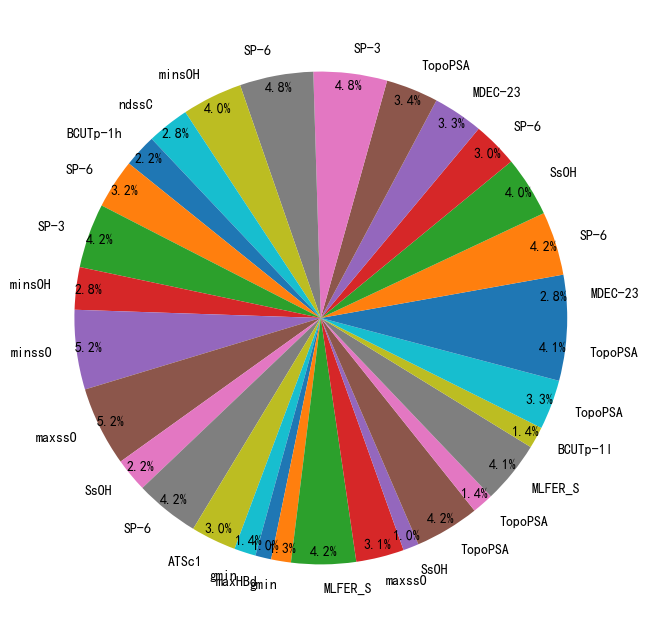

In [16]:
#最终筛选出分子
max_molecule=[]
for key,value in sort_correlation.iteritems():
    maxKey=''
    maxValue=0
    for i,j in piaier[key].iteritems():
        if i!=key:
            if maxValue<j:
                maxKey=i
                maxValue=j
    max_molecule.append([maxKey,maxValue])
max_molecule=pd.DataFrame(max_molecule)
# print(max_molecule.shape)
plt.figure(figsize=(8,8))
plt.pie(max_molecule.iloc[:,1],labels=max_molecule.iloc[:,0],autopct="%.1f%%",pctdistance=0.95)
plt.show()
# print(sort_correlation)

In [17]:
twinty_molecule=[
    'MDEC-23',
    'minsOH',
    'BCUTp-1h',
    'C1SP2',
    'maxdO',
    'XLogP',
    'ATSm5',
    'maxHBd',
    'maxssO',
    'SHBint10',
    'SPC-6',
    'BCUTp-1l',
    'maxsF',
    'minHBa',
    'MDEO-12',
    'ATSc5',
    'maxHBint5',
    'ATSc1',
    'gmin',
    'SHBint7'
]

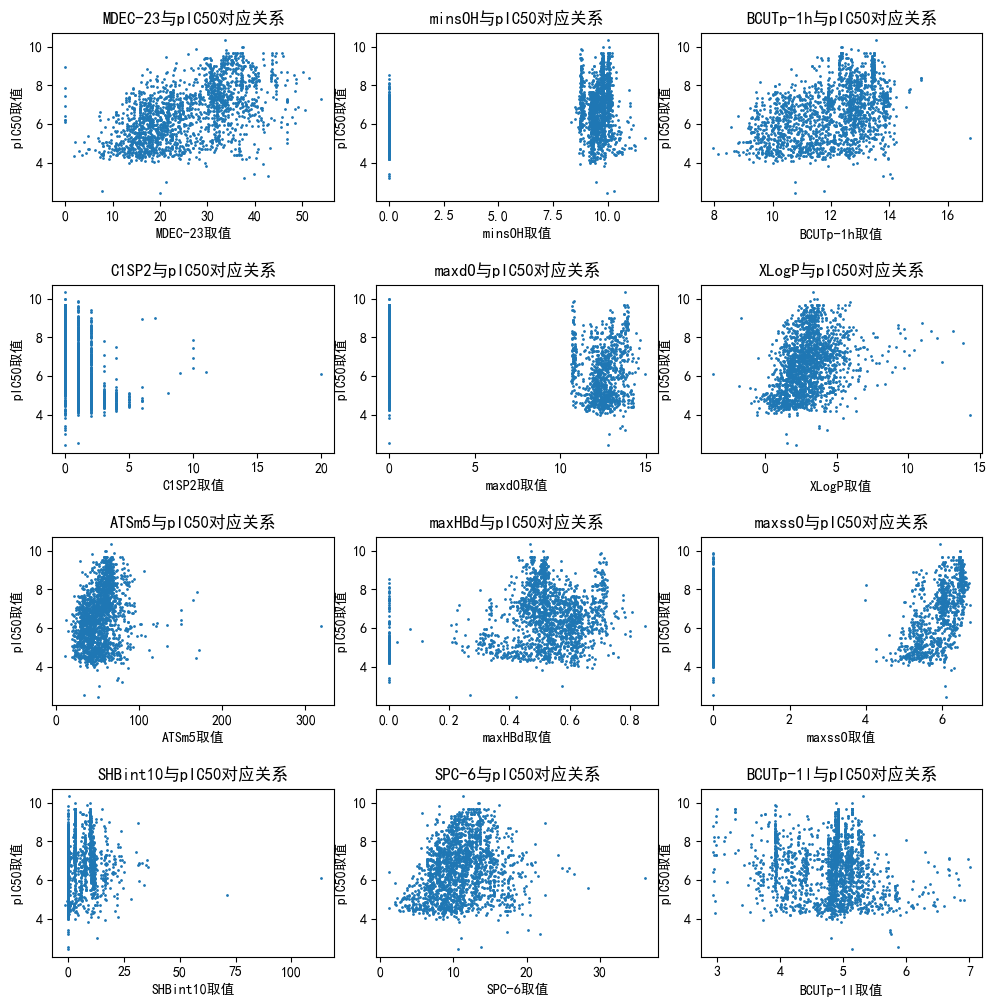

In [18]:
x=x_s[twinty_molecule]
plt.figure(figsize=(12,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.5)
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.scatter(x.iloc[:,i],y,s=1)
    plt.ylabel("pIC50取值")
    plt.xlabel(list(x)[i]+"取值")
    plt.title(list(x)[i]+"与pIC50对应关系")

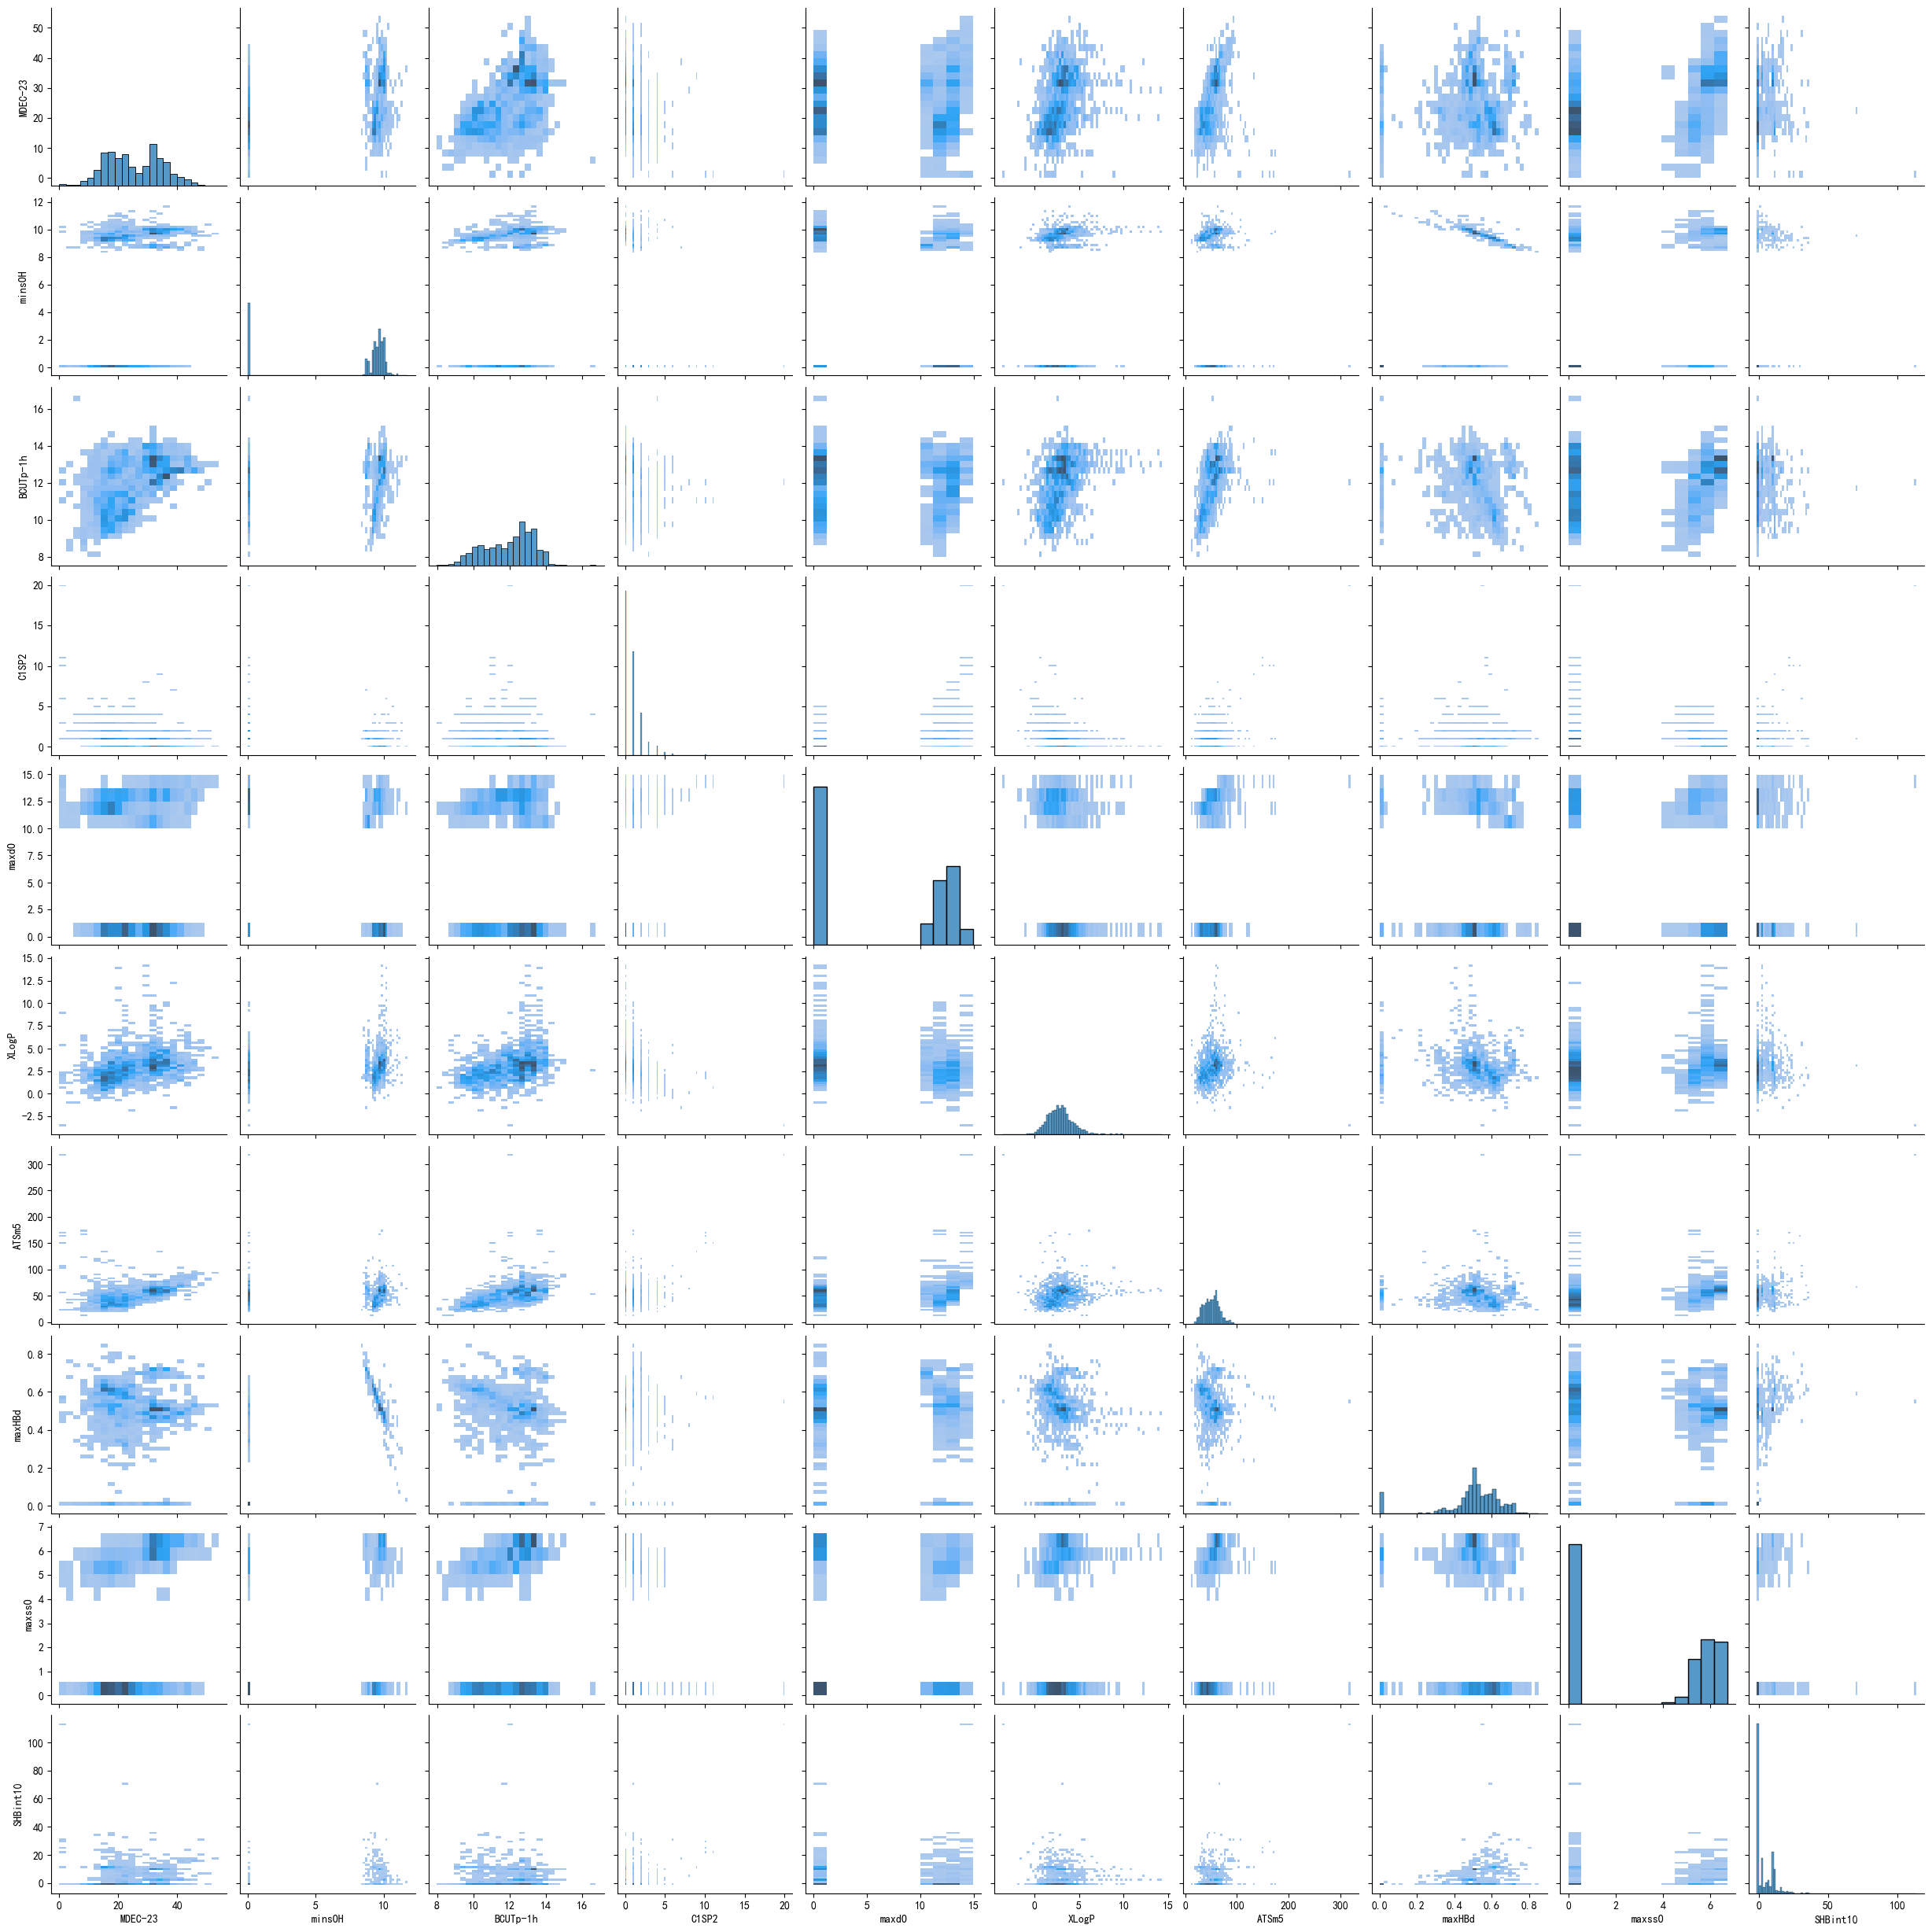

In [19]:
sns.pairplot(data=x[twinty_molecule].iloc[:,:10], kind="hist")